## Аналитика  в интернет-магазине видеоигр
### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1) </n>
- [Предобработка данных](#step2) </n>
- [Исследовательский анализ данных](#step3) </n>
- [Портреты пользователей](#step4) </n>
- [Проверка статистических гипотез](#step5) </n>
- [Общий вывод](#step6) </n>

---

### План исследования
- Исправить пропущенные и нулевые значения;
- Изменить типы данных там, где необходимо;
- Привести названия столбцов к нижнему регистру;

---

- Посчитать суммарные продажи во всех регионах.
- Посмотреть, сколько игр выпускалось в конкретные годы и определить степень важности этих данных;
- Выбрать платформы с наибольшими суммарными показателями продаж и построить распределения;
- Определить актуальный период;
- Определить наиболее прибыльные платформы;
- Построить боксплот по глобальным продажам каждой игры и разбивкой по платформам, и описать полученные результаты;
- Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы;
- Соотнести выводы с продажами на других платформах;
- Проанализировать общее распределение игр по жанрам.

---

- Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж;
- Самые популярные жанры (топ-5). Описать разницу;
- Выявить, влияет ли рейтинг ESRB на продажи в отдельном регионе?

---

- Проверить гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и сформулировать альтернативную;
- Проверить гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные" и сформулировать альтернативную.

---

- Написать общий вывод.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from math import factorial

In [2]:
# импортируем данные
games = pd.read_csv('')

In [3]:
# первичное представление о данных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# первые 5 строк
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# посмотрим на уникальные значения
for column in games.columns:
    print(games[column].value_counts())

Need for Speed: Most Wanted                    12
Ratatouille                                     9
LEGO Marvel Super Heroes                        9
Madden NFL 07                                   9
FIFA 14                                         9
                                               ..
World Soccer Winning Eleven 7 International     1
Shining Hearts                                  1
Moe Moe 2-ji Taisen (Ryoku) * Deluxe            1
Pac-Man Party                                   1
Option Tuning Car Battle                        1
Name: Name, Length: 11559, dtype: int64
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: P

In [6]:
# проверим данные на пропуски
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# проверим данные на дубликаты
games.duplicated().sum()

0

#### Вывод

#### Наименования столбцов 
- Name - название игры;
- Platform - платформа;
- Year_of_Release - год выпуска;
- Genre - жанр игры;
- NA_sales - продажи в Северной Америке;
- EU_sales - продажи в Европе;
- JP_sales - продажи в Японии;
- Other_sales - продажи в других странах;
- Critic_Score - оценка критиков;
- User_Score - оценка пользователей;
- Rating - рейтинг от организации ESRB.

---

#### Обнаруженные проблемы
- в столбце Name есть пропущенные значения - 2 шт;
- Year_of_Release - нецелочисленный тип данных и пропущенные значения - 269 шт;
- в столбце Genre пропущенные значения - 2 шт;
- в столбцах NA_sales, EU_sales, JP_sales и Other_sales много нулевых и аномальных значений;
- в столбце Critic_Score нецелочисленный тип данных и пропущенные значения - 8678 шт;
- в столбце User_Score нецелочисленный тип данных и присутствуют значения tbd;
- в столбце Rating есть пропущенные значения - 6766 шт.

---

#### Предположения о появлении пропусков, нулевых значений и рекомендации по их исправлению
- Пропуски в столбцах Name и Genre взаимосвязаны. Их 4 шт. и они могли возникнуть из-за того, что данные по этим строкам не были внесены в таблицу. Можно просто удалить их, на общую картину они не повлияют;
- Пропуски в столбце Year_of_Release могут быть связаны с отсутствием данных о выпуске игры на определенной платформе. Можно заполнить пропуски в соответствии с датой выхода игры на другой платформе. Если не получится заполнить - удалить;
- Нулевые значения в столбцах NA_sales, EU_sales, JP_sales и Other_sales связаны с отсутствием данных о продажах конкретных игр в конкретных регионах. Можно заменить эти значения специальным маркером, например, -777;
- Пропуски в столбцах Critic_Score, User_Score и Rating связаны с тем, что оценки критиков, пользователей и возрастной рейтинг не были загружены на агрегатор оценков. Можно попробовать заменить их нулевым значением или специальным маркером. Также в этих столбцах есть значения TBD (о нем ниже). Его также можно заменить специальным маркером.

---

#### TBD и Metacritic
Очевидно, что оценки игр в таблице были взяты с сайта-агрегатора Metacritic. На нем также есть информация о фильмах, сериалах, музыкальных альбомах и т.д. На нам предусмотрены идентичные нашему проекту критерии оценки продукта: Critic Reviews (от 0 до 100) и User Score (от 0 до 10). Оценка продукта отображается на сайте в том случае, если есть хотя бы четыре отзывы от критиков или пользователей. Если отзывов не хватает, то продукту присваивается значение TBD - To Be Determined.

---

#### На этапе предобработки необходимо:
- Исправить пропущенные и нулевые значения;
- Тип данных в столбцах Year_of_Release, Critic_Score и User_Score привести к целочисленному типу.
- Названия столбцов в таблице привести к нижнему регистру;
- Посчитать суммарные продажи во всех регионах.

### <a id='step2'>Предобработка данных</a>

In [8]:
# приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

In [9]:
# проверим
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
# удалим пропуски в столбцах name и genre
games.dropna(subset = ['name', 'genre'], inplace = True)

In [11]:
# проверим на пропуски
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [12]:
# функция для замены пропусков в столбце year_of_release на основании значений столбца name
def year_of_release(row):
    for i in range(1980, 2016):
        if (str(i) in row[0]) and (np.isnan(row[1])):
            return i
    return row[1]

# применим функцию
games['year_of_release'] = games[['name', 'year_of_release']].apply(year_of_release, axis = 1)

In [13]:
# проверим
games.isna().sum()

name                  0
platform              0
year_of_release     252
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [14]:
# функция смогла заменить только 17 значений, что ж, удалим остальные
games.dropna(subset = ['year_of_release'], inplace = True)

In [15]:
# проверим
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

In [16]:
# пропуски в столбцах critic_score, user_score и rating заменим специальным маркером
games[['critic_score', 'user_score', 'rating']] = games[['critic_score', 'user_score', 'rating']].fillna(777)

In [17]:
# значения tbd также заменим специальным маркером
games[['critic_score', 'user_score', 'rating']] = games[['critic_score', 'user_score', 'rating']].replace('tbd', 777)

In [18]:
# значения в столбцах year_of_release и critic_score приведем к целочисленным значениям
games[['year_of_release', 'critic_score']] = games[['year_of_release', 'critic_score']].astype('int')

In [19]:
# значения в столбце user_score приведем к десятичному формату\
# приведем к целочисленному типу\
# и появившееся значением заменим специальным маркером
games['user_score'] = games['user_score'].astype('float').astype('int').replace(-110, 777)

In [20]:
# проверим
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,777,777,777
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,777,777,777


In [21]:
# посчитаем суммарные продажи по всем регионам
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [22]:
# проверим
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,777,777,777,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,777,777,777,31.38


### <a id='step3'>Исследовательский анализ данных</a>

In [23]:
# посмотрим, сколько игр было выпущено в разные годы
games_count = games.groupby('year_of_release').agg({'name': 'nunique'})

In [24]:
games_count.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


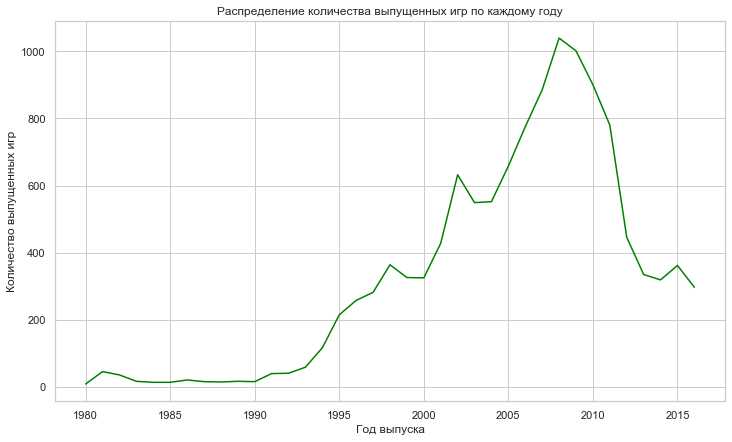

In [25]:
# построим график
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
sns.lineplot(data=games_count, x='year_of_release', y='name', color='green')
plt.title('Распределение количества выпущенных игр по каждому году')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show();

- Больше всего игр было выпущено в период с 2005 по 2009 год (кажется, очень хорошие были времена);
- Меньше всего игр было выпущено в период с 1980 по 1994 года, что вполне объяснимо, т.к инслутрия видеоигр на тот момент находилась в начале свого пути;
- Общий рост количества выпущенных видеоигр начался с 1994 года и закончился в 2013 году.

In [26]:
# посмотрим суммарные продажи по всем платформам
games_total = games.pivot_table(index='year_of_release', columns ='platform', values='total_sales', aggfunc='sum')

In [27]:
# выведем таблицу с конца
games_total.tail()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2012,NaN,NaN,51.36,NaN,11.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.71,17.56,99.74,NaN,NaN
2013,NaN,NaN,56.57,NaN,1.54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.59,21.65,88.58,NaN,18.96
2014,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2015,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,NaN,60.14
2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,4.60,1.52,NaN,26.15


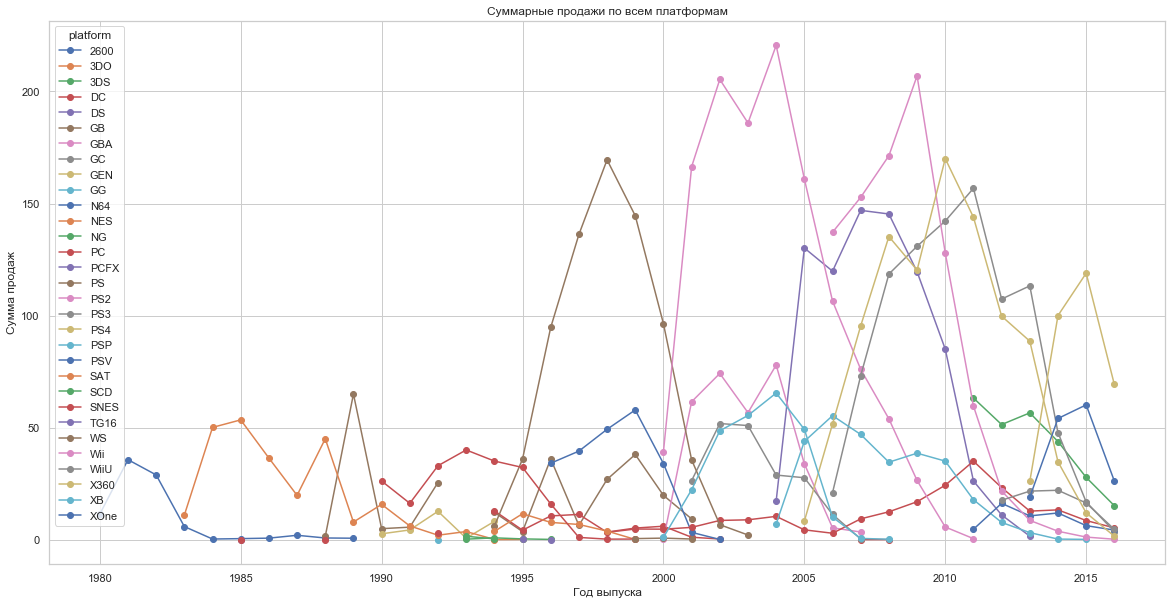

In [28]:
# нарисуем график
games_total.plot(figsize=(20, 10), style='o-', grid=True)
plt.title('Суммарные продажи по всем платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.show();

- Основная масса данных сосредоточена в период с 2000 до 2016 года;
- В среднем, платформа остается актуальной в течение пяти-шести лет. Исключение составляет Playstation 2, которая продолжала оставаться актуальной до 2011 года, несмотря на то, что в 2006 году вышла Platstation 3;
- PC держится дольше остальных платформ (с 1994 года), но это объяснимо тем, что это мультиплатформа;
- Основными лидерами являются консоли Playstation, они показывабт самые высокие показатели. У Playstation 2 самые высокие значения за весь период.

#### За актуальный период примем промежуток с 2012 по 2016 год.

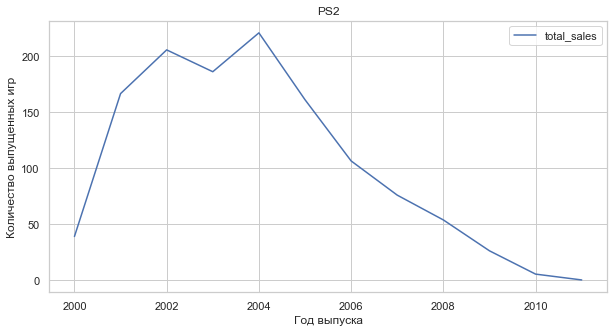

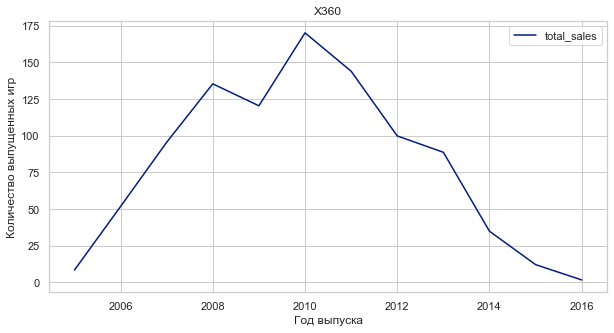

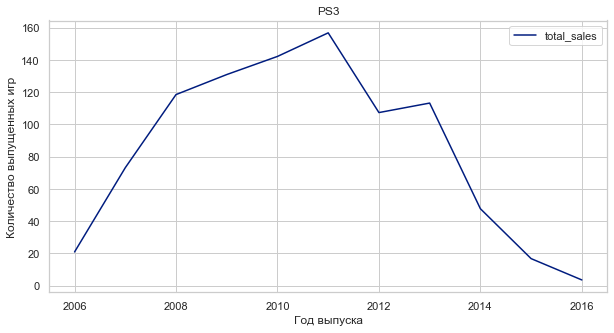

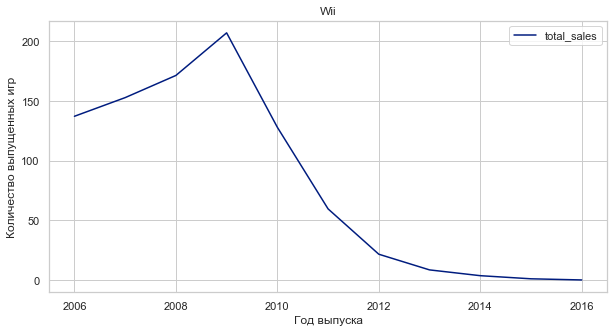

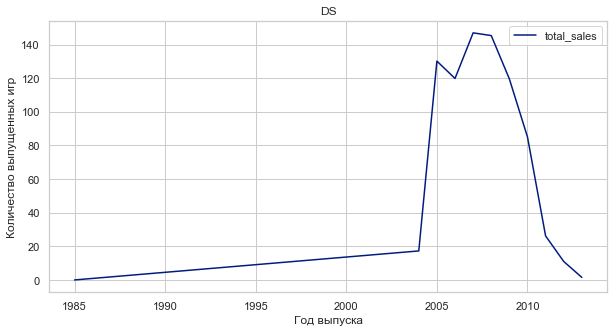

In [29]:
# определим топ-5 платформ за все время
top_5_year = games.\
groupby(['platform'], as_index = False)['total_sales']\
.sum().sort_values('total_sales', ascending = False)\
.head(5)['platform'].tolist()


# цикл для отрисовки графиков
for name in top_5_year:
    games.query('platform == @name').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
    .sort_values('year_of_release',ascending = False).\
    plot(figsize = (10, 5), title = name)
    plt.style.use('seaborn-dark-palette')
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество выпущенных игр')
    plt.legend()
    plt.show();

#### PS2:
- Выпущена в 2000 году и с тех пор стремительное набирирала популярность вплоть до пикового значения в 2004 года. После 2004 года начался спад, жизненный цикл закончился в 2011 году. Является лидером по количеству выпущенных игр. 

---

#### X360:
- Выпущен в 2005 году, пик популярности наступил в 2010 году. Затем начался спад, жизненный цикл закончился в 2016 году. Игр выпущено больше, чем на PS3.

---

#### PS3:
- Выпущена годом позже, чем XBOX 360. Пик популярности наступил в 2011 году, затем начался спад до 2013 года (очевидно, что спад прекратился, т.к была выпущена The Last of Us и GTAV).

---

#### Wii:
- Выпущена в 2007 году. Пик популярности наступил в 2009 году, затем канула в небытие. Оказалась очень непоплярной консолью и меньше остальных продержалась в топе.

---

#### DS
- Выпущена в 1985 году и дольше остальных продержалась на рынке. С 1985 года начинается плавный рост в количестве выпущенных игр, а в 2004 резкий рост. Рост продолжился до 2007 года, а после (из-за появления PS3 и XBOX 360) спрос на DS сошел на нет.

In [30]:
# сделаем срез основого датасета по актуальному периоду
games = games.query('year_of_release >= 2012')

In [31]:
# выведем 5 строк
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,777,777,777,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,777,777,777,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5,M,13.79


In [32]:
# посчитаем суммарные продажи за актуальный период
games_total_clean = games.pivot_table(index='year_of_release', columns ='platform', values='total_sales', aggfunc='sum')

In [33]:
# выведем 5 строк
games_total_clean.head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.73,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


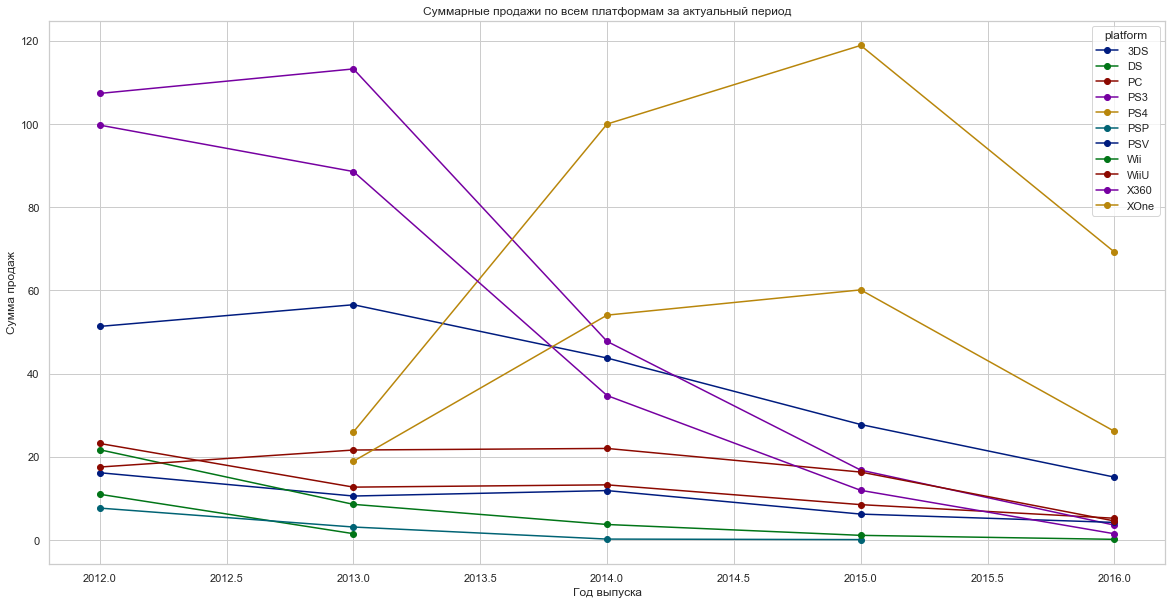

In [34]:
# нарисуем график
games_total_clean.plot(figsize=(20, 10), style='o-', grid=True)
plt.title('Суммарные продажи по всем платформам за актуальный период')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.show();

- Playstation 4 в лидерах. Пик популярности в 2015 году;
- XBOX One сразу за PS4, но показатели у него почти в два раза хуже;
- Предыдущее поколение консолей заканчивает свой жизненный цикл, что ясно из плавного спада после выхода новых PS и XBOX;
- В целом, у всех платформ наблюдается спад в значениях к 2016 году. Это может быть связано с тем, что большинство крутых игр будет выпущено после этого года (а так оно и окажется:)) или ближе к концу текущего поколения.

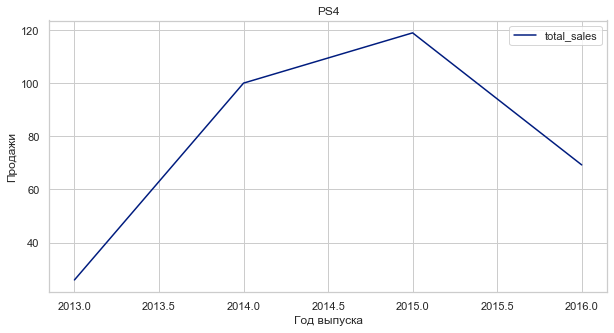

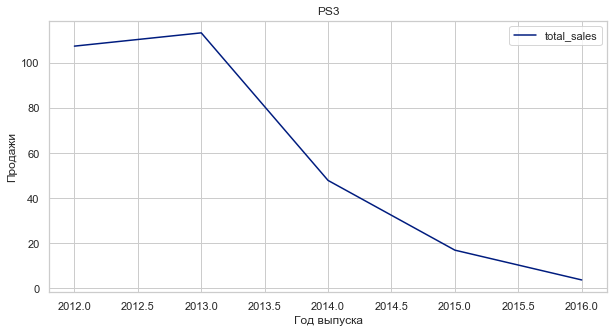

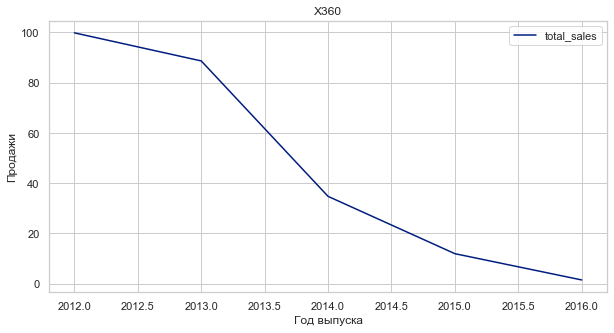

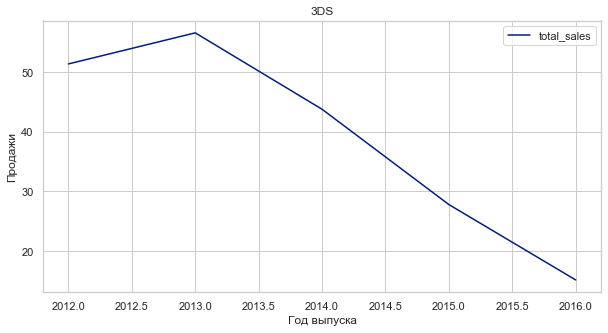

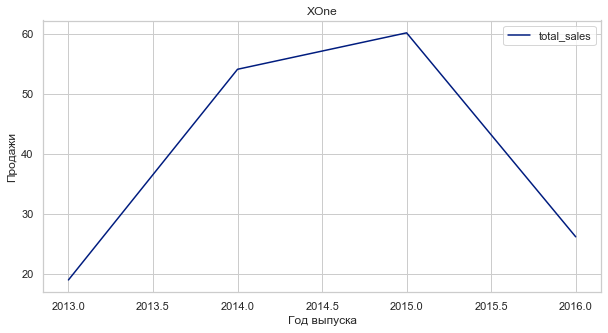

In [35]:
# определим топ5 платформ за актуальный период
top_5_year = games.\
groupby(['platform'], as_index = False)['total_sales']\
.sum().sort_values('total_sales', ascending = False)\
.head(5)['platform'].tolist()

# цикл для отрисовки графика
for name in top_5_year:
    games.query('platform == @name').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
    .sort_values('year_of_release',ascending = False).\
    plot(figsize = (10, 5), title = name)
    plt.style.use('seaborn-dark-palette')
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи')
    plt.legend()
    plt.show()

- Потенциально прибыльными платформами на будущее определенно можно назвать Playstation 4 и XBOX ONE. Это консоли нового поколения и по-настоящему крутые тайтлы на них только начинают выходить, чего нельзя сказать о прекрасных (но устаревших) PS3 и XBOX 360. 3DS особо не пользуется популярностью ввиду узкой направленности игр, выпускаемых на нее. 

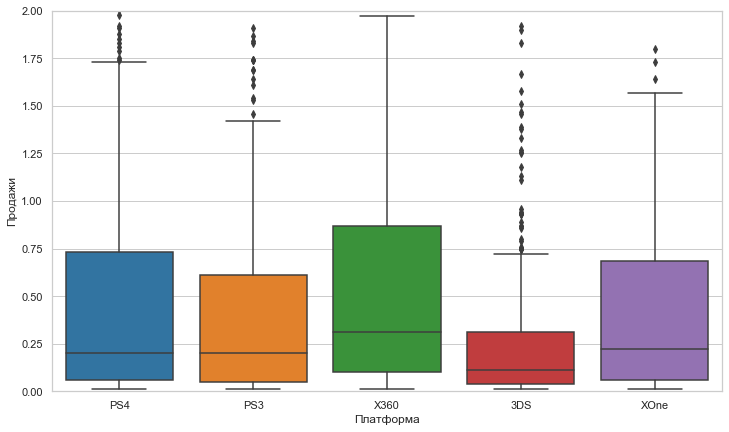

In [36]:
# построим боксплоты для топ-5 платформ по продажам за актуальный период
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x="platform", y="total_sales", data=games,\
                 order=["PS4", "PS3", "X360", "3DS", "XOne"],\
                palette="tab10")
ax.set_ylim([0, 2])
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show();

- Медианное значение у PS3, PS4 и XBOX ONE распределены практически одинакого. Можно предположить, что продажи игр на этих платформах схожи между собой;
- Меньше всех медианное значение у 3DS, а больше всех у XBOX 360.;
- Самый большой межквартильный размах у XBOX 360. 25-й перцентиль и 75-й перцентиль у него распределены на более высоких значений;
- У XBOX 360 отсутствуют выбросы.

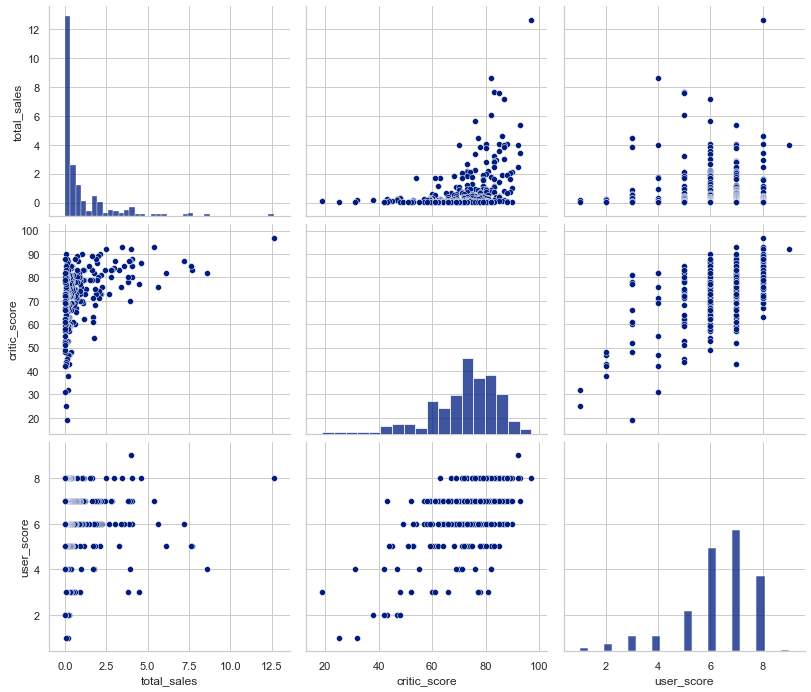

In [37]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе PS4
ps4_corr = games.query('(platform == "PS4") and (critic_score != 777) and (user_score != 777)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(ps4_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [38]:
ps4_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.027162
critic_score,0.405895,1.000000,0.562397
user_score,-0.027162,0.562397,1.000000


- Корреляция между продажами и отзывами критиков выражена слабо (0.4), но стремится в большую сторону;
- Корреляция между продажами и отзыми пользователей практически отсутствует (-0.02).

Можно предположить, что чем выше у игры будут оценки критиков, чем больше будут ее продажи. Оценка критиков имеет гораздо больший вес, чем оценка простых игроков.

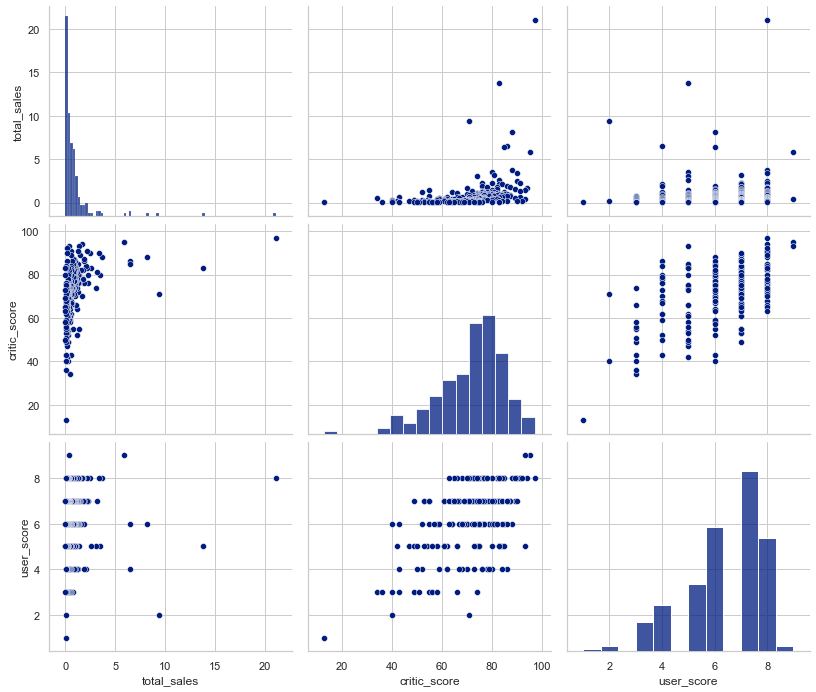

In [39]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе PS3
ps3_corr = games.query('(platform == "PS3") and (critic_score != 777) and (user_score != 777)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(ps3_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [40]:
ps3_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.331057,0.009512
critic_score,0.331057,1.000000,0.519882
user_score,0.009512,0.519882,1.000000


- Корреляция между отзывами критиков и продажами выражена слабо (0.33);
- Корреляция между отзывами пользователей и продажами выражена слабо (0.009).

Можно предположить, что оценки критиков играют большую роль в продажах, чем оценки пользователей.

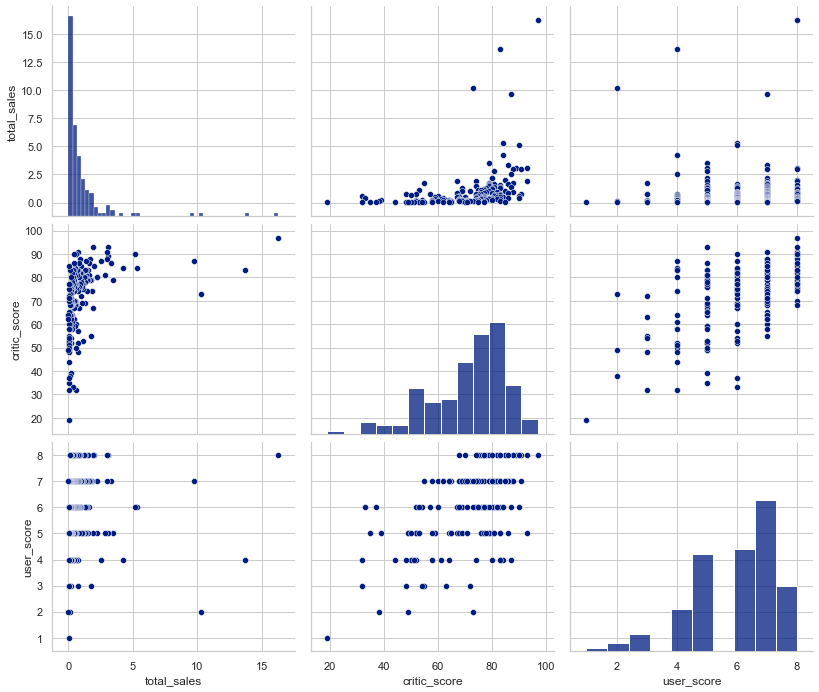

In [41]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе PS3
x360_corr = games.query('(platform == "X360") and (critic_score != 777) and (user_score != 777)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(x360_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [42]:
x360_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,-0.004465
critic_score,0.360573,1.000000,0.529585
user_score,-0.004465,0.529585,1.000000


- Корреляция между отзывами критиков и продажами выражена слабо (0.37);
- Корреляция между отзывами пользователей и продажами выражена отрицательно (-0.004).

Можно предположить, что оценки критиков имеют больший вес, чем оценки пользователей.

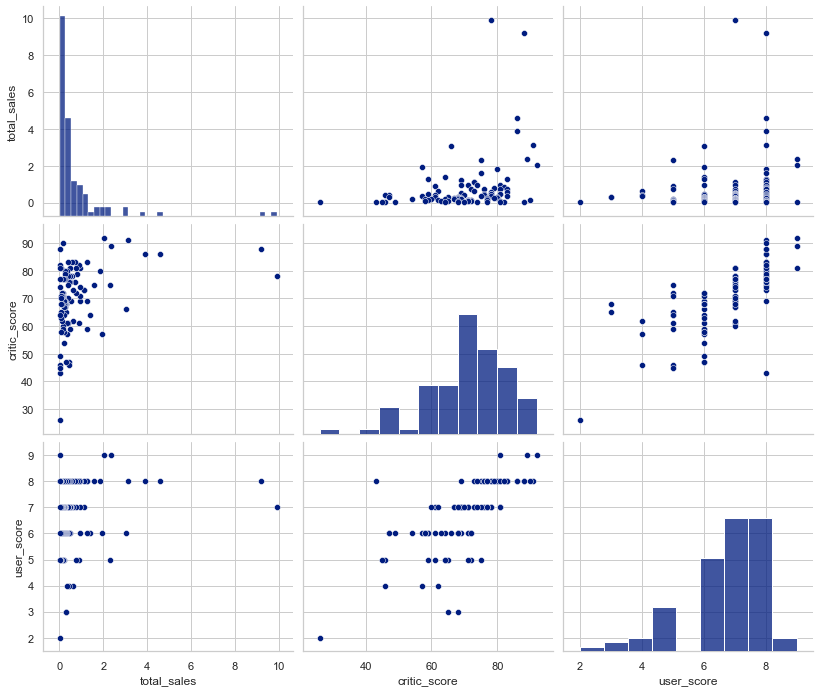

In [43]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе 3DS
ds_corr = games.query('(platform == "3DS") and (critic_score != 777) and (user_score != 777)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(ds_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [44]:
ds_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.310553,0.194176
critic_score,0.310553,1.000000,0.706023
user_score,0.194176,0.706023,1.000000


- Корреляция между отзывами критиков и продажами выражена слабо-положительно (0.31);
- Корреляция между отзывами пользователей и продажами выражена слабо-положительно (0.19);

Можно предположить, что на данной платформе продажи одинаково зависят как от отзывов критиков, так и от отзывов игроков.

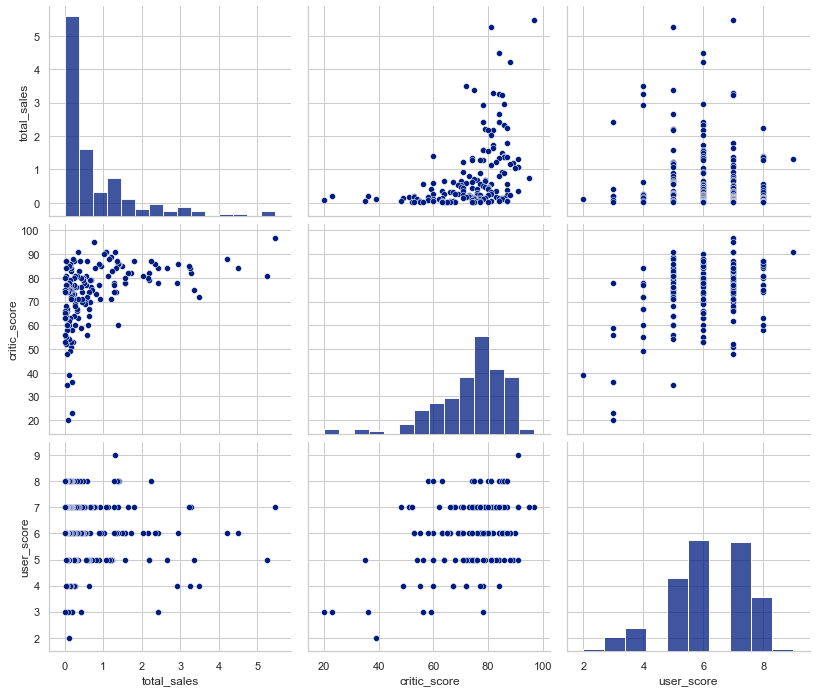

In [45]:
# диаграмма рассеяния для определения корреляции между отзывами и продажами на платформе 3DS
xone_corr = games.query('(platform == "XOne") and (critic_score != 777) and (user_score != 777)')\
[['total_sales', 'critic_score', 'user_score']]

# нарисуем графики
ax = sns.pairplot(xone_corr)
ax.fig.set_size_inches(12, 10)
plt.show();

In [46]:
xone_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.410422,-0.111769
critic_score,0.410422,1.000000,0.442396
user_score,-0.111769,0.442396,1.000000


- Корреляция между отзывами критиков и продажами имеет положительную тенденцию (0.41);
- Корреляция между отзывами пользователей и продажами выражена отрицательно (-0.11).

Можно предположить, что оценки критиков влияют на продажи видеоигр, а оценки пользователей нет.

#### Общий вывод по платформам:
- Сильнее всех корреляция между отзывами критиков и продажами выражена на платформах XBOX ONE и Playstation 4;
- Слабее всех корреляция между отзывами критиков и продажми выражена на платформах Playstation 3 и 3DS;
- Сильнее всех корреляция между отзывами пользователей и продажами выражена на плафторме 3DS;
- Слабее всех корреляция между отзывами пользователей и продажами выражена на платформе XBOX ONE.

В целом, на успех видеоигр больше влияют оценки профессиональных критиков, чем обычных игроков.

In [47]:
# посмотрим на распределение продаж по всем жанрам

# таблица с суммарными продажами по всем жанрам
platform_genre_sales = games.groupby('genre').agg({'total_sales' : 'sum'}).fillna(0)\
.sort_values('total_sales', ascending=False)

In [48]:
# проверим
platform_genre_sales

,total_sales
genre,
Action,441.47
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


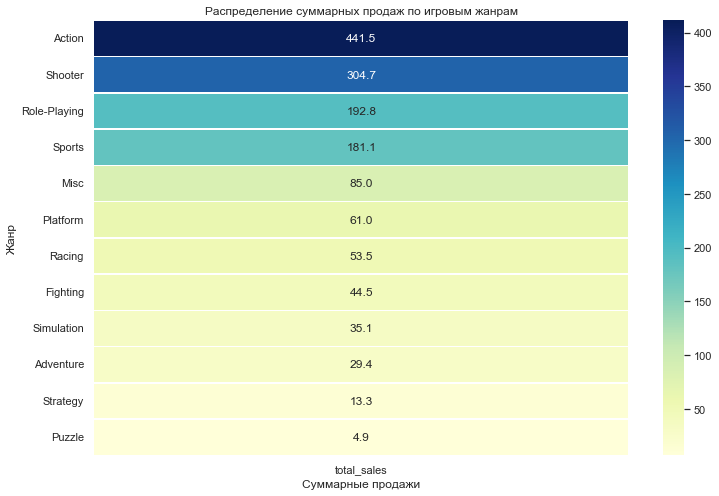

In [49]:
# нарисуем тепловую карту

plt.figure(figsize=(12, 8))
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f",\
           linewidths=.5, cmap="YlGnBu", robust=True)
plt.title('Распределение суммарных продаж по игровым жанрам')
plt.xlabel('Суммарные продажи')
plt.ylabel('Жанр')
plt.show();

- Самым прибыльными жанром является Action, а неприбыльным Puzzle;
- Также достатчоно хорошие показатели у жанров Shooter, RPG и Sports;
- Средние показатели у жанров Adventure, Fighting, Racing, Platform, Simulation, Misc.

В целом, можно сказать, что самые динамичные, захватывающие жанры, расположены на лидирующих позициях, в то время, как медитативные жанры, например, Puzzle и Strategy не могут похвастаться такими значениями. Вполне возможно, что они менее востребованы на рынке и у них достаточно маленькая корр.аудитория. К тому же они, скорее всего, не имеют мультиплеер, что тоже негативно сказывается на продажах. Взять хотя бы GTA V, которая с 2013 года приносит Rockstar колоссальные деньги.
Конечно, стоит отметить тот факт, что AAA-проект требует гораздо больших денег для разработки, чем игры инди-студий.

#### Вывод

#### Результаты по всем данным
- Топ-5 платформ - Playstation 2, XBOX 360, Playstation 3, Wii, 3DS;
- Большего всего игр выпущено в период с 2005 по 2099 год;
- Меньше всего игр выпущено в период с 1980 по 1994 год;
- Основной объем данных по суммарным продажам распределен в диапазоне от 2000 до 2016 года. Основными лидерами по продажам являются игровые консоли Playstation;
- Средняя продолжительность жизненного цикла платформы составляет 5-6 лет лет. Дольше всех продержались Playstation 2 (самая успешная игровая консоль) и PC;
- Актуальный период для исследования - с 2012 по 2016 год.

---

#### Результаты по актуальному периоду
- Топ-5 платформ - Playstation 4, Playstation 3, XBOX 360, 3DS, XBOX ONE;
- Если учитывать только новое поколоение консолей, то лидерами по продажам являются Playstation 4 и XBOX ONE. Предыдущее поколение консолей тоже показывает хорошие показатели, но они постепенно снижаются. В целом, у всех платформ наблюдается спад по продажам к 2016 году, что вполне можно объяснить отсутствие крутых AAA-тайтлов;
- Медианные значения у PS3, PS4 и XBOX ONE распределены одинаково. Очевидно, что продажи игр схожи между собой на этих платформах.
- Оценки критиков играюь большую роль в продажах видеоигр, чем оценки обычных пользователей, о чем свидетельствуют данные по корреляции;
- Самый прибыльный жанр Action, а неприбыльный Puzzle. Также хорошие показатели у жанров Shooter, RPG и Sports.

### <a id='step4'>Портреты пользователей</a>

#### Определим топ-5 платформ для каждого региона

In [50]:
# США
games_usa = games.groupby("platform")['na_sales'].sum()

In [51]:
games_usa.head()

platform
3DS     55.31
DS       4.59
PC      19.18
PS3    103.38
PS4    108.74
Name: na_sales, dtype: float64

In [52]:
# посчитаем процентное соотношение
data_usa_per = games_usa.groupby('platform')\
.agg(Percentage = ('na_sales', lambda p: p.sum() / games_usa.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

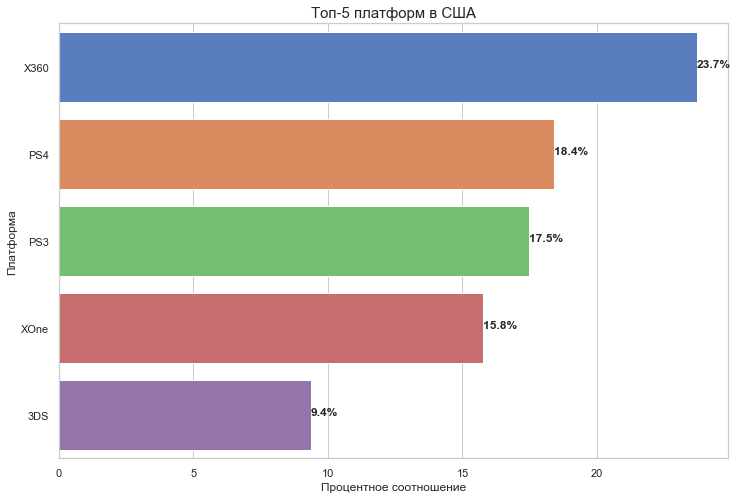

In [53]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_usa_per.index, data=data_usa_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 платформ в США", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Платформа")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Самая популярная платформа - XBOX 360 - 23.7%;
- Самая непопулярная платформа - 3DS - 9.4%;
- Практически равные доли у PS4 И PS3 - 18.4% и 17.5%;
- Доля консолей XBOX на рынке США больше, чем доля консолей Playstation.

In [54]:
# Европа
games_eu = games.groupby("platform")['eu_sales'].sum()

In [55]:
games_eu.head()

platform
3DS     42.64
DS       3.53
PC      38.01
PS3    106.86
PS4    141.09
Name: eu_sales, dtype: float64

In [56]:
# посчитаем процентное соотношение
data_eu_per = games_eu.groupby('platform')\
.agg(Percentage = ('eu_sales', lambda p: p.sum() / games_eu.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

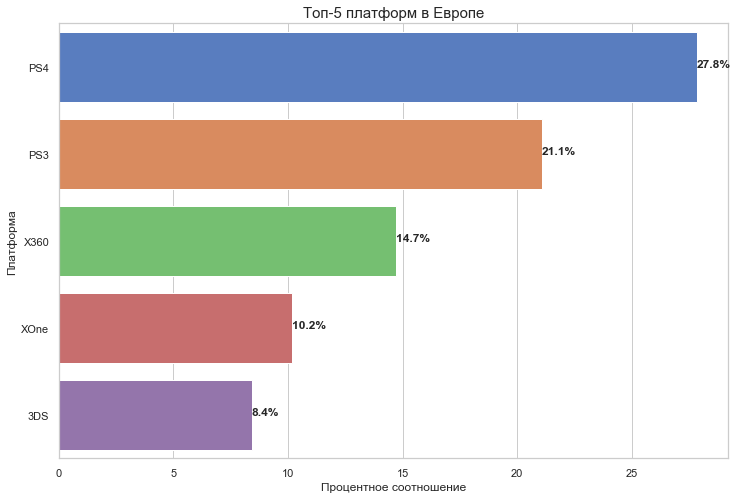

In [57]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_eu_per.index, data=data_eu_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 платформ в Европе", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Платформа")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Самая популярная платформа - PS4 - 27.4%;
- Самая непопулярная платформа - 3DS - 8.4%;
- Доля консолей Playstation в Европе больше, чем доля консолей XBOX.

In [58]:
# Япония
games_jp = games.groupby("platform")['jp_sales'].sum()

In [59]:
games_jp.head()

platform
3DS    87.79
DS      3.72
PC      0.00
PS3    35.29
PS4    15.96
Name: jp_sales, dtype: float64

In [60]:
# посчитаем процентное соотношение
data_jp_per = games_jp.groupby('platform')\
.agg(Percentage = ('jp_sales', lambda p: p.sum() / games_jp.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

In [61]:
data_jp_per.head()

,Percentage
platform,
3DS,45.59
PS3,18.32
PSV,10.93
PS4,8.29
WiiU,6.76


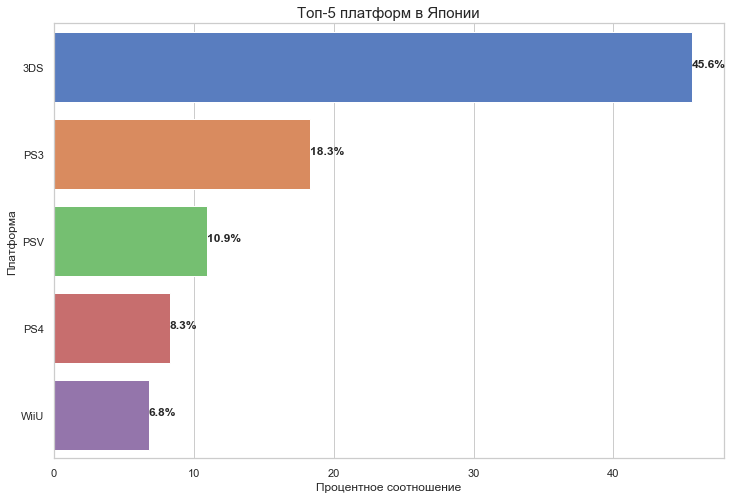

In [62]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_jp_per.index, data=data_jp_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 платформ в Японии", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Платформа")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Самая популярная плафторма - 3DS - 45.6%;
- Самая непопулярная платформа - WiiU - 6.8%;
- Доля 3DS на рынке Японии больше, чем у всех остальных консолей из топ-5 вместе взятых. Действительно, альтернативная реальность, а не страна.

#### Определим топ-5 жанров для каждого региона

In [63]:
# США
games_genre_na = games.groupby("genre")['na_sales'].sum()

In [64]:
games_genre_na.head()

genre
Action       177.90
Adventure      8.92
Fighting      19.79
Misc          38.19
Platform      25.38
Name: na_sales, dtype: float64

In [65]:
# посчитаем процентное соотношение
data_na_genre_per = games_genre_na.groupby('genre')\
.agg(Percentage = ('na_sales', lambda p: p.sum() / games_genre_na.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

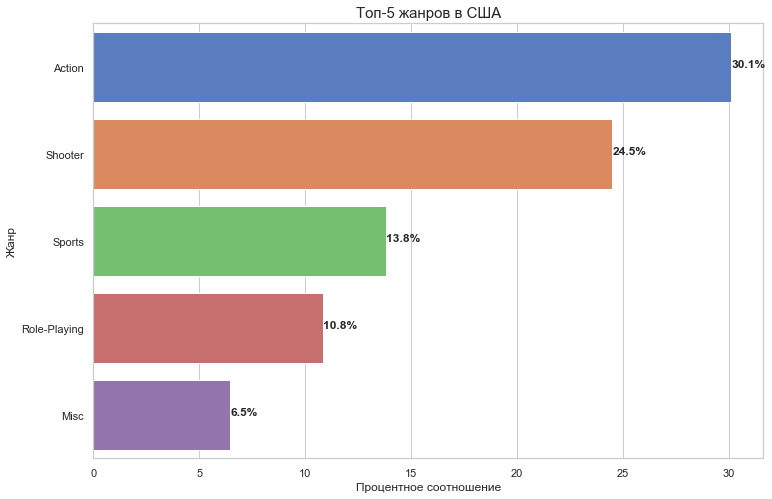

In [66]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_na_genre_per.index, data=data_na_genre_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 жанров в США", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Жанр")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Самые популярные жанры - Action - 30.1% и Shooter - 24.5%;
- Самый непопулярный жанр - Misc - 6.5%.

In [67]:
# Европа
games_genre_eu = games.groupby("genre")['eu_sales'].sum()

In [68]:
games_genre_eu.head()

genre
Action       159.59
Adventure      9.46
Fighting      10.79
Misc          26.32
Platform      21.41
Name: eu_sales, dtype: float64

In [69]:
# посчитаем процентное соотношение
data_eu_genre_per = games_genre_eu.groupby('genre')\
.agg(Percentage = ('eu_sales', lambda p: p.sum() / games_genre_eu.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

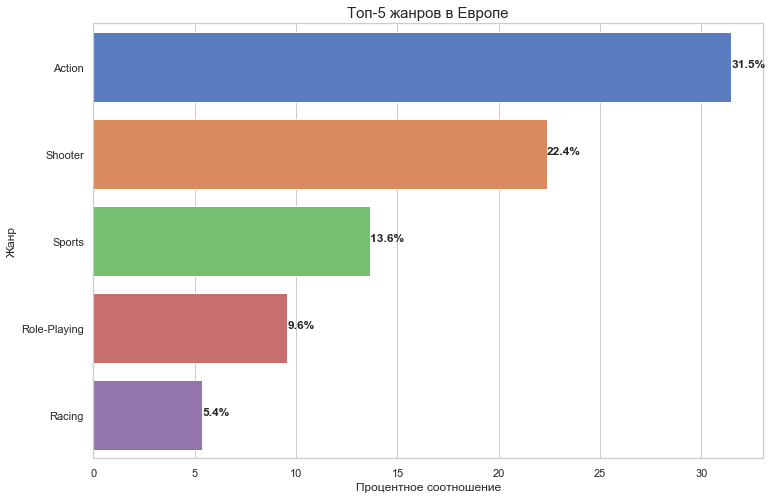

In [70]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_eu_genre_per.index, data=data_eu_genre_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 жанров в Европе", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Жанр")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Самые популярные жанры - Action - 31.5% и Shooter - 22.4%;
- Самый непопулярный жанр - Racing - 5.4%.

In [71]:
# Япония
games_genre_jp = games.groupby("genre")['jp_sales'].sum()

In [72]:
games_genre_jp.head()

genre
Action       52.80
Adventure     8.24
Fighting      9.44
Misc         12.86
Platform      8.63
Name: jp_sales, dtype: float64

In [73]:
# посчитаем процентное соотношение
data_jp_genre_per = games_genre_jp.groupby('genre')\
.agg(Percentage = ('jp_sales', lambda p: p.sum() / games_genre_jp.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

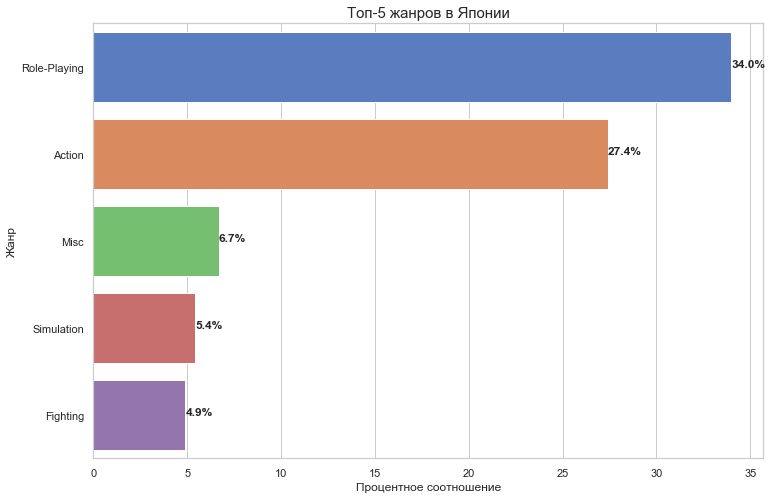

In [74]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_jp_genre_per.index, data=data_jp_genre_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 жанров в Японии", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Жанр")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Самые популярные жанры - RPG - 34% и Action - 27.4%;
- Остальные жанры не особо предпочтительны в Японии.

#### Определим наиболее распространненные возрастные рейтинги

In [75]:
# США
games_rating_usa = games.query('rating != 777').groupby("rating")['na_sales'].sum()

In [76]:
games_rating_usa.head()

rating
E       114.37
E10+     75.70
M       231.63
T        66.02
Name: na_sales, dtype: float64

In [77]:
# посчитаем процентное соотношение
data_usa_rating_per = games_rating_usa.groupby('rating')\
.agg(Percentage = ('na_sales', lambda p: p.sum() / games_rating_usa.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

In [78]:
data_usa_rating_per.head()

,Percentage
rating,
M,47.49
E,23.45
E10+,15.52
T,13.54


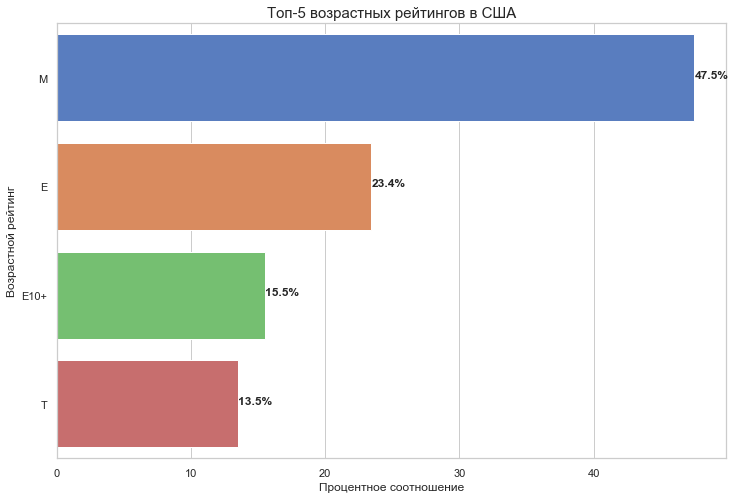

In [79]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_usa_rating_per.index, data=data_usa_rating_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 возрастных рейтингов в США", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Возрастной рейтинг")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Наиболее популярны игры с рейтингом M - 47.5%;
- Наименее популярны игры с рейтингами T и E10+ - 13.5% и 15.5%;
- Игры с рейтингом E распределены посередине и занимают уверенное положение на рынке - 23.4%.

Доля игры с рейтингом М занимает практически половину всего рынка США, а игры с более "детскими" возрастными рейтингами значительно отстают. Можно сделать предположение, что рынок видеоигр в США более ориентирован на пользователей в возрасте от 17 лет и страше, хотя нельзя исключать то, что в игры с возрастным рейтингом M играет и молодые геймеры. Видеоигры с рейтингом E (для всех) занимают уверенное положение на рынке и обгоняют "игры для подростков от 13 до 19" и "игры для всех".

In [80]:
# Европа
games_rating_eu = games.query('rating != 777').groupby("rating")['eu_sales'].sum()

In [81]:
games_rating_eu.head()

rating
E       113.03
E10+     55.37
M       194.21
T        52.96
Name: eu_sales, dtype: float64

In [82]:
# посчитаем процентное соотношение
data_eu_rating_per = games_rating_eu.groupby('rating')\
.agg(Percentage = ('eu_sales', lambda p: p.sum() / games_rating_eu.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

In [83]:
data_eu_rating_per.head()

,Percentage
rating,
M,46.73
E,27.20
E10+,13.32
T,12.74


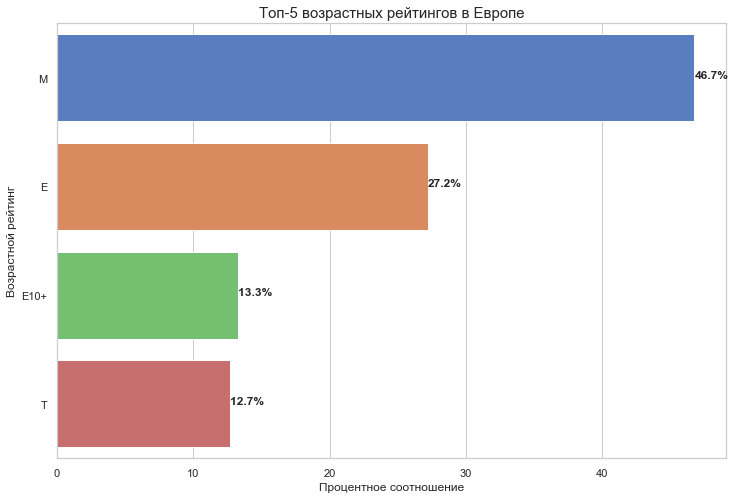

In [84]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_eu_rating_per.index, data=data_eu_rating_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 возрастных рейтингов в Европе", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Возрастной рейтинг")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Наиболее популярные игры с рейтингом M - 46.7%;
- Наименее популярные игры с рейтингами T и E10+ - 12.7% и 13.3%;
- Игры с рейтингом E занимают уверенное место на рынке и превосходят эту же категорию игр в США - 27.2%.

Распределение возрастных рейтингов в Европе практически совпадает с распределением возрастных рейтингов в США. Единственное отличие - игры в категории "для всех" занимают в Европе чуть большую долю на рынке.

In [85]:
# Япония
games_rating_jp = games.query('rating != 777').groupby("rating")['jp_sales'].sum()

In [86]:
games_rating_jp.head()

rating
E       28.33
E10+     8.19
M       21.20
T       26.02
Name: jp_sales, dtype: float64

In [87]:
# посчитаем процентное соотношение
data_jp_rating_per = games_rating_jp.groupby('rating')\
.agg(Percentage = ('jp_sales', lambda p: p.sum() / games_rating_jp.sum() * 100))\
.round(2)\
.sort_values('Percentage', ascending = False).head()

In [88]:
data_jp_rating_per.head()

,Percentage
rating,
E,33.83
T,31.07
M,25.32
E10+,9.78


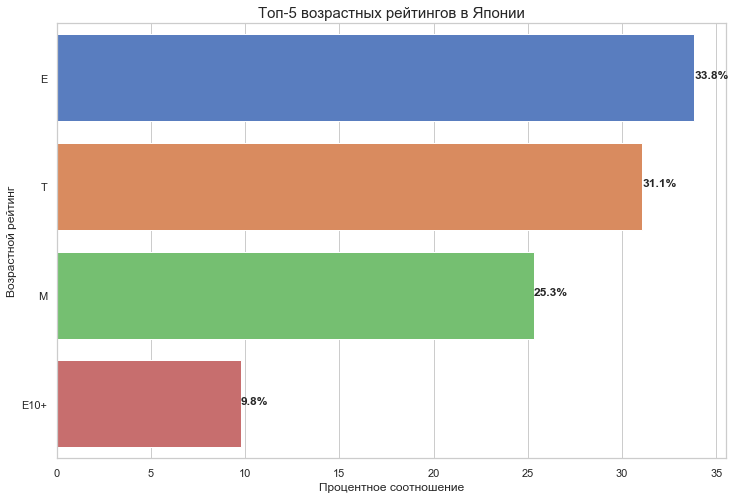

In [89]:
# нарисуем график
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y=data_jp_rating_per.index, data=data_jp_rating_per, ci=None, palette= "muted", orient='h' )
ax.set_title("Топ-5 возрастных рейтингов в Японии", fontsize=15)
ax.set_xlabel ("Процентное соотношение")
ax.set_ylabel ("Возрастной рейтинг")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%"% rect.get_width(), weight='bold' )

- Наиболее популярные игры с рейтингом - E, T и M - 33.8%, 31.1% и 25.3%;
- Наименее популярны игры с рейтингом E10+ - 9.8%.

В Японии распределение возрастных рейтингов наиболее равномерное. Нет сильных различий между значениями (за исключением игр с рейтингом E10+).

#### Портреты пользователей

#### Портрет пользователя США
1. Предпочитаемая платформа: консоль марки XBOX;
2. Предпочитаемые жанры: Action и Shooter;
3. Предпочитаемый возврастной рейтинг: M.

---

#### Портрет пользователя Европа
1. Предпочитаемая платформа: консоли марки Playstation;
2. Преподчитаемые жанры: Action и Shooter;
3. Предпочитаемый возрастной рейтинг: M.

---

#### Портрет пользователя Япония
1. Предпочитаемая платформа: 3DS;
2. Предпочитаемые жанры: RPG и Action;
3. Преподчитаемый возврастной рейтинг: E и T.

---

В целом, портреты пользоватей в США и в Европе практически идентичны. Одинаковые предпочитаемые жанры и возрастной рейтинг игр. Разница лишь в предпочитаемыех марках консолей - XBOX vs Playstation.

Совершенно иные показатели в Японии. Наиболее популярная консоль - 3DS, хотя в США и В Европе она наименее востребована. В Японии самый популярный жанр - RPG, а в остальных регионах он не так распространен. В Японии наиболее популярные игры с возрастными рейтингами E И T, в то время, как в США и в Европе с рейтингом M.

### <a id='step5'>Проверка статистических гипотез</a>

#### Проверим гипотезу - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

#### H0 - Средние пользовательские рейтинги платформ Xbox One и PC не различаются;
#### H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются;

In [90]:
# создаю отдельные датафреймы с данными о пользовательском рейтинге для XOne и PC
user_score_xone = games.query('(platform == "XOne") & (user_score != -11)')['user_score']
user_score_pc = games.query('(platform == "PC") & (user_score != -11)')['user_score']

alpha = .05

# ttest
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.01767986586175777
Отвергаем нулевую гипотезу


#### Проверим гипотезу - "Средние пользовательские рейтинги жанров Action и Sports разные"

#### H0 - Средние пользовательские рейтинги жанров Action и Sports не различаются;

#### H1 - Средние пользовательские рейтинги жанров Action и Sports различаются.

In [91]:
# создаю отдельные датафреймы с данными о пользовательском рейтинге для Action и Sports
user_score_xone = games.query('(genre == "Action") & (user_score != -11)')['user_score']
user_score_pc = games.query('(genre == "Sports") & (user_score != -11)')['user_score']

alpha = .05

# ttest
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  7.205485598220411e-12
Отвергаем нулевую гипотезу


#### Гипотеза H1 о статистическом различии средних значений пользовательских рейтингов на платформах Xbox One и PC была подтвеждена.

---

#### Гипотеза H1 о статистическом различии средних значений пользовательских рейтингов жанров Action и Sports была подтверждена.

Средние пользовательские рейтинги на платформах XBOX One и PC различаются. Средние пользовательские рейтинги жанров Action и Sports различаются.

### <a id='step6'>Общий вывод</a>

#### Задачей проекта было установить закономерности, определяющие успешность видеоигры.

#### Показатели за весь временной промежуток
- Топ-5 платформ - Playstation 2, XBOX 360, Playstation 3, Wii, 3DS;
- Большего всего игр выпущено в период с 2005 по 2099 год;
- Меньше всего игр выпущено в период с 1980 по 1994 год;
- Основной объем данных по суммарным продажам распределен в диапазоне от 2000 до 2016 года. Основными лидерами по продажам являются игровые консоли Playstation;
- Средняя продолжительность жизненного цикла платформы составляет 5-6 лет лет. Дольше всех продержались Playstation 2 (самая успешная игровая консоль) и PC;

---

#### Показатели за актуальный период
- Топ-5 платформ - Playstation 4, Playstation 3, XBOX 360, 3DS, XBOX ONE;
- Если учитывать только новое поколоение консолей, то лидерами по продажам являются Playstation 4 и XBOX ONE. Предыдущее поколение консолей тоже показывает хорошие показатели, но они постепенно снижаются. В целом, у всех платформ наблюдается спад по продажам к 2016 году, что вполне можно объяснить отсутствие крутых AAA-тайтлов;
- Оценки критиков играюь большую роль в продажах видеоигр, чем оценки обычных пользователей, о чем свидетельствуют данные по корреляции;
- Самый прибыльный жанр Action, а неприбыльный Puzzle.

---

#### Портреты пользователей для каждого региона

#### Портрет пользователя США
1. Предпочитаемая платформа: консоль марки XBOX;
2. Предпочитаемые жанры: Action и Shooter;
3. Предпочитаемый возврастной рейтинг: M.

---

#### Портрет пользователя Европа
1. Предпочитаемая платформа: консоли марки Playstation;
2. Преподчитаемые жанры: Action и Shooter;
3. Предпочитаемый возрастной рейтинг: M.

---

#### Портрет пользователя Япония
1. Предпочитаемая платформа: 3DS;
2. Предпочитаемые жанры: RPG и Action;
3. Преподчитаемый возврастной рейтинг: E и T.

---

#### В процессе исследования необходимо было проверить гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

#### Гипотеза H1 о статистическом различии средних значений пользовательских рейтингов на платформах Xbox One и PC была подтвеждена.

#### Гипотеза H1 о статистическом различии средних значений пользовательских рейтингов жанров Action и Sports была подтверждена.

---

#### Основными аспектами, влияющими на успех игры являются:
- отзывы профессиональных критиков;
- платформа, на которой была выпущена игра (предпочтительнее Playstation 4 и XBOX ONE);
- жанр игры (Action, Shooter или RPG (если собрались захватывать местный рынок));
- возрастной рейтинг (для США и Европы - М, для Японии - E или T).